### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak naprawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks


In [2]:
def Hough_ab(img,aMin,aMax,aSkok,bMin,bMax,bSkok):

  A = np.arange(aMin,aMax,aSkok)
  B = np.arange(bMin,bMax,bSkok)

  H = np.zeros((B.shape[0],A.shape[0]))
  X,Y = img.shape

  for i in range(X):
    for j in range(Y):

      if (img[i,j] == 1):

        for a_idx in range(len(A)):

          b = i-A[a_idx]*j
          b_idx = np.argmin(abs(B-b))

          H[b_idx,a_idx] += 1

  return H


In [3]:
#kod z głównych ćwiczen

def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

In [4]:
#definiowanie parametrów

aMin = -5
aMax = 5
aSkok = 0.05
bMin = -100
bMax = 100
bSkok = 1


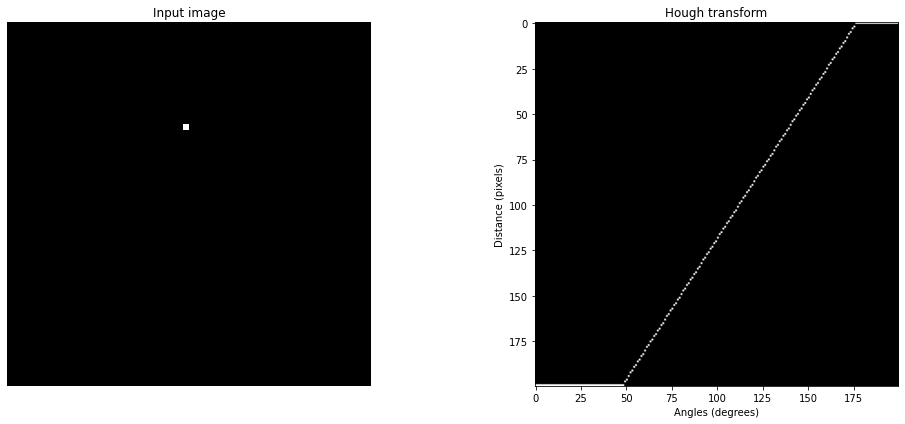

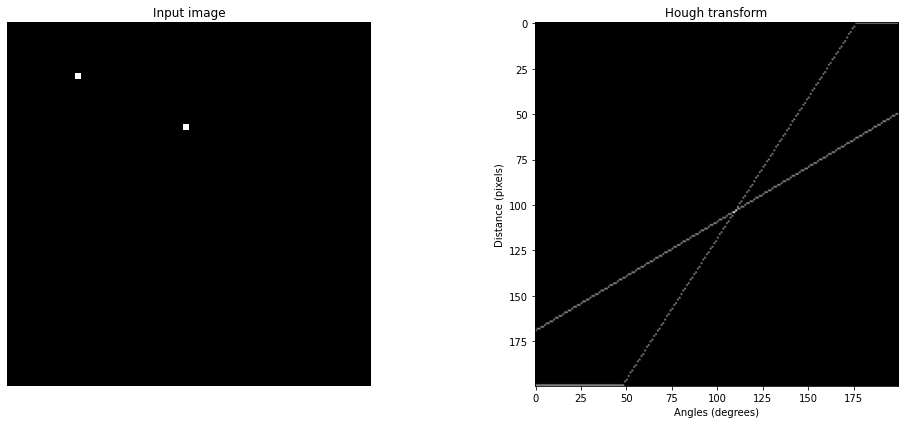

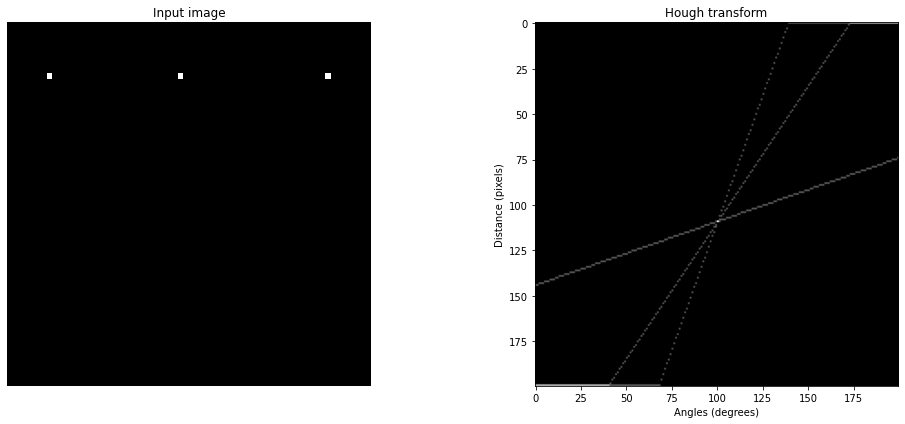

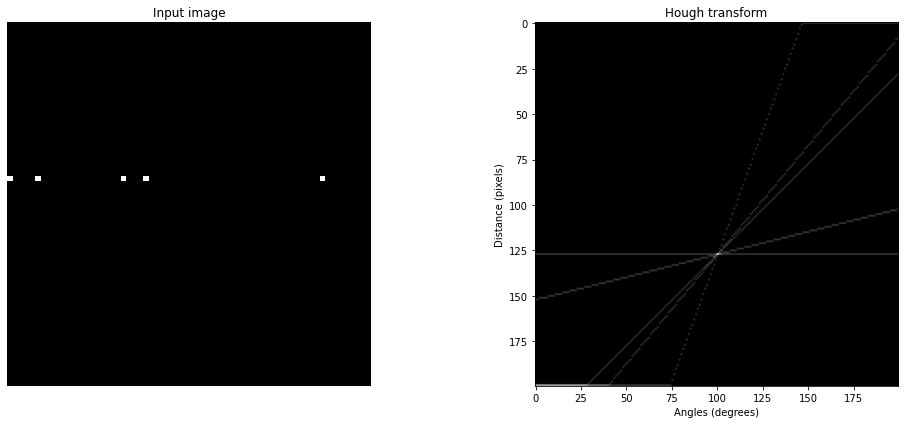

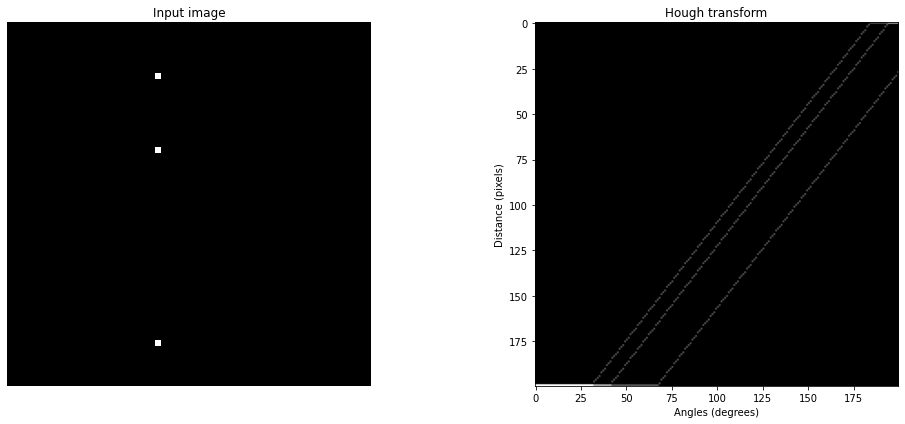

In [7]:
im1 = np.zeros((64,64), dtype=np.uint8)
im2 = np.zeros((64,64), dtype=np.uint8)
im3 = np.zeros((64,64), dtype=np.uint8)
im4 = np.zeros((64,64), dtype=np.uint8)
im5 = np.zeros((64,64), dtype=np.uint8)

im1[18, 31] = 1

im2[18, 31] = 1
im2[9, 12] = 1

im3[9, 7] = 1
im3[9, 56] = 1
im3[9, 30] = 1

im4[27,55] = 1
im4[27,20] = 1
im4[27,24] = 1
im4[27,5] = 1
im4[27,0] = 1

im5[9, 26] = 1
im5[56, 26] = 1
im5[22, 26] = 1

H_matrix = Hough_ab(im1,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(H_matrix,im1)


H_matrix2 = Hough_ab(im2,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(H_matrix2,im2)


H_matrix3 = Hough_ab(im3,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(H_matrix3,im3)


H_matrix4 = Hough_ab(im4,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(H_matrix4,im4)

H_matrix5 = Hough_ab(im5,aMin,aMax,aSkok,bMin,bMax,bSkok)
show_hough(H_matrix5,im5)


Dla tych samych x, to znaczy dla lini pionwych - wtedy wzór y = ax + b tak nie do końca jest poprawny.